## Ensemble Methods

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
from google.colab import files 
uploaded= files.upload ()

Saving ENB2012_data.xlsx to ENB2012_data.xlsx


In [10]:
data=pd.read_excel("ENB2012_data.xlsx")
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [29]:
names=["compacidad relativa", " área de superficie","área de pared","área de techo","altura total","orientación","área de acristalamiento", "distribución del área de acristalamiento", "carga de calefacción (HL)", "carga de refrigeración (CL)"]
data=pd.read_excel("ENB2012_data.xlsx",names=names)

## Data
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

Esta investigación desarrolla un marco de aprendizaje automático estadístico para estudiar el efecto de ocho variables independientes: compacidad relativa, área de superficie, área de pared, área de techo, altura total, orientación, áreas de acristalamiento y la distribución del área de acristalamiento, sobre dos variables a saber, la carga energética de calefacción (HL) y
carga de refrigeración (CL), de edificios residenciales.

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compacidad relativa,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
área de superficie,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
área de pared,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
área de techo,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
altura total,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
orientación,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
área de acristalamiento,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
distribución del área de acristalamiento,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
carga de calefacción (HL),768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
carga de refrigeración (CL),768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [31]:
data=data.drop(columns=["carga de calefacción (HL)"])


In [32]:
data.head()

,compacidad relativa,área de superficie,área de pared,área de techo,altura total,orientación,área de acristalamiento,distribución del área de acristalamiento,carga de refrigeración (CL)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


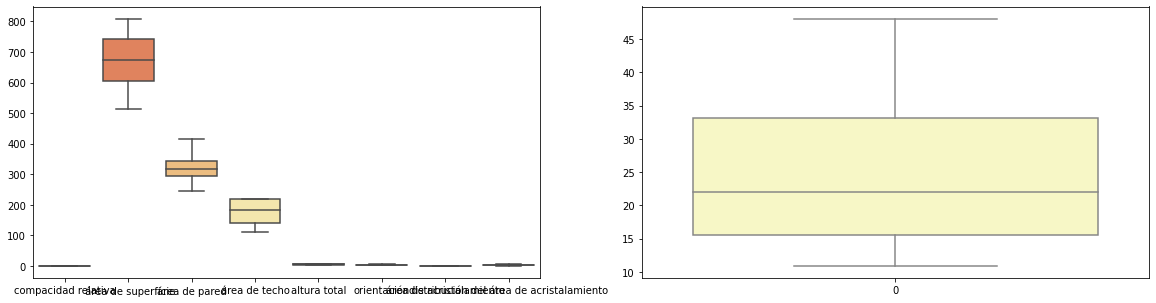

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["carga de refrigeración (CL)"],fliersize=4,palette="Spectral")
plt.show()

In [38]:
# Fill empty and NaNs values with NaN
data=data.fillna(np.nan)
# Check for Null values
data.isnull().sum()

compacidad relativa                         0
 área de superficie                         0
área de pared                               0
área de techo                               0
altura total                                0
orientación                                 0
área de acristalamiento                     0
distribución del área de acristalamiento    0
carga de refrigeración (CL)                 0
dtype: int64

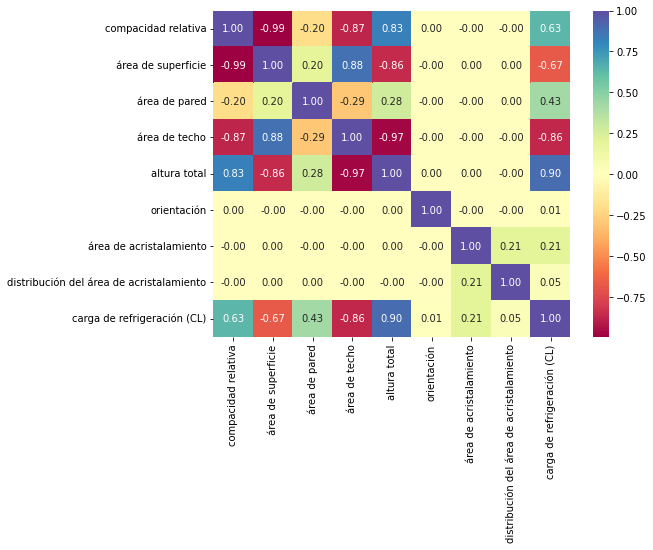

In [39]:
# Correlation matrix between numerical values MATRIZ DE CORRELACIÓN
plt.figure(figsize=(8,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

<Figure size 360x216 with 0 Axes>

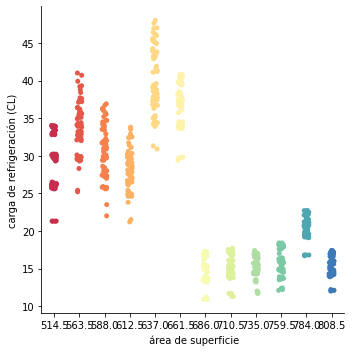

In [52]:
plt.figure(figsize=(5,3))
g = sb.catplot(x=" área de superficie",y="carga de refrigeración (CL)",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

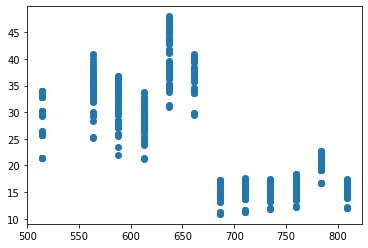

In [53]:
plt.scatter(data[" área de superficie"],data["carga de refrigeración (CL)"])
plt.show()

## Modelación

In [54]:
from sklearn.model_selection import train_test_split

In [79]:
X1=data.drop(columns="carga de refrigeración (CL)") #Todas las variables menos Y
y1=data["carga de refrigeración (CL)"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=1432) # SE PARTEN LOS DATOSEN 3 PARTES 1 PARTE PARA MODELA

## Modelización simple
#### Validación cruzada de modelos

In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [57]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


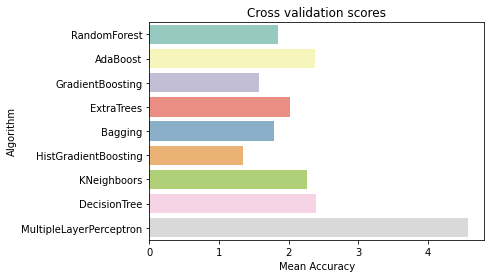

In [59]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
#classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X1_train,y1_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X1_train,y1_train)
    y1_pred=classifier.predict(X1_test)
    cv_results2.append(np.sqrt(mean_squared_error(y1_pred,y1_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [60]:
#Los modelos mas presentantivos fueron: MLPRegressor, AdaBoost, DecisionTree y KNeighbors. 

MLPR = MLPRegressor()
MLPR.fit(X1_train,y1_train)

AdaR = AdaBoostRegressor()
AdaR.fit(X1_train,y1_train)

DCSR = DecisionTreeRegressor()
DCSR.fit(X1_train,y1_train)

KNR = KNeighborsRegressor()
KNR.fit(X1_train,y1_train)

pred_MLPR=MLPR.predict(X1_test)
pred_AdaR=AdaR.predict(X1_test)
pred_DCSR=DCSR.predict(X1_test)
pred_KNR=KNR.predict(X1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [61]:
for i,j in zip([pred_MLPR,pred_AdaR,pred_DCSR,pred_KNR],["MLPR","AdaR","DCSR","KNR"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y1_test)))

RMSE for  MLPR is  4.649869156569184
RMSE for  AdaR is  2.2653935444303968
RMSE for  DCSR is  2.399900998614236
RMSE for  KNR is  2.2629149586840906


Ensamble por Voting

In [63]:
#voting : {'hard', 'soft'}
votingR = VotingRegressor(estimators=[('MLPR',MLPR),('AdaR',AdaR),('DCSR', DCSR),('kNR', KNR)], n_jobs=4)
votingR = votingR.fit(X1_train, y1_train)
Resistencia_predicted_All_Voting = votingR.predict(X1_test)

In [64]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Resistencia_predicted_All_Voting,y1_test)))

RMSE for Voting is  2.1418875885123567


Ensamble por Steking

In [65]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingR = StackingRegressor(estimators=[('MLPR',MLPR),('AdaR',AdaR),('DCSR', DCSR),('kNR', KNR)], n_jobs=4)
stackingR = stackingR.fit(X1_train, y1_train)
Resistencia_predicted_All_Stacking = stackingR.predict(X1_test)

In [66]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Resistencia_predicted_All_Stacking,y1_test)))

RMSE for Stacking is  1.7996244498028353


In [69]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y1_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["MLPR","AdaR","DCSR","KNR","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_KNR),rmse(pred_DCSR),rmse(pred_AdaR),rmse(pred_MLPR),rmse(Resistencia_predicted_All_Voting),rmse(Resistencia_predicted_All_Stacking)]

In [70]:
resultados.T

,0,1,2,3,4,5
Modelo,MLPR,AdaR,DCSR,KNR,Voting,Stacking
RMSE,2.262915,2.399901,2.265394,4.649869,2.141888,1.799624


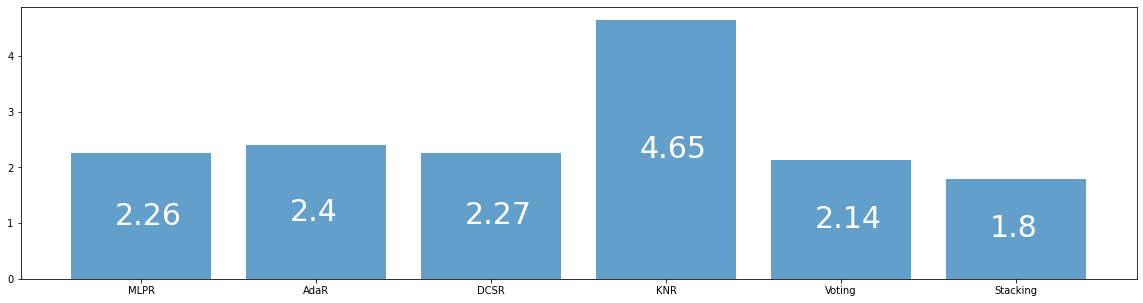

In [72]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

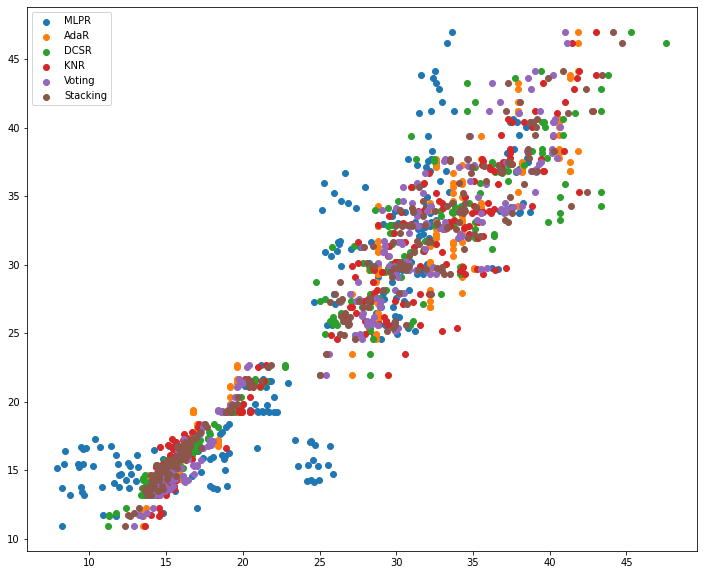

In [81]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_MLPR,pred_AdaR,pred_DCSR,pred_KNR,Resistencia_predicted_All_Voting,Resistencia_predicted_All_Stacking],["MLPR","AdaR","DCSR","KNR","Voting","Stacking"]):
    plt.scatter(i,y1_test, label=j)
    plt.legend()
plt.show()

Se concluye que con el método de ensamble por Stacking, se mejora la regresion del modelo pues su error cuadratico medio disminuye a 1.8, en comparación con un promedio de 2.3 al que se llegaba con los metodos de MLPR, AdaR, y DCSR. 